Author: DHRUV

Batch: 15July - 15August

Domain: Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sys
print(sys.version)

3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]


In [3]:
train=pd.read_csv("imdb.csv")

In [4]:
train.head()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0


In [5]:
print(train)

      Rank                                     Movie_name  Year Certificate  \
0        1                       The Shawshank Redemption  1994           R   
1        2                                  The Godfather  1972           R   
2        3                                The Dark Knight  2008       PG-13   
3        4  The Lord of the Rings: The Return of the King  2003       PG-13   
4        5                               Schindler's List  1993           R   
..     ...                                            ...   ...         ...   
995    996                                        Sabrina  1954      Passed   
996    997                          From Here to Eternity  1953      Passed   
997    998                Snow White and the Seven Dwarfs  1937    Approved   
998    999                                   The 39 Steps  1935    Approved   
999  1,000                              The Invisible Man  1933       TV-PG   

     Runtime_in_min                         Genre  

In [6]:
train.shape

(1000, 9)

In [7]:
train.describe()

,Runtime_in_min,Metascore,Rating_from_10
count,1000.000000,840.000000,1000.000000
mean,123.798000,78.795238,7.968100
std,28.540844,12.021474,0.277145
min,45.000000,28.000000,7.600000
25%,103.000000,71.000000,7.800000
50%,120.000000,80.000000,7.900000
75%,138.000000,88.000000,8.100000
max,321.000000,100.000000,9.300000


In [8]:
train.isna().sum()

Rank                0
Movie_name          0
Year                0
Certificate         7
Runtime_in_min      0
Genre               0
Metascore         160
Gross_in_$_M      159
Rating_from_10      0
dtype: int64

In [9]:
df_ratings=pd.read_csv("ratings.dat", sep="::", engine="python")
df_ratings.dropna(inplace=True)
df_ratings.head(10)

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
5,1,1287,5,978302039
6,1,2804,5,978300719
7,1,594,4,978302268
8,1,919,4,978301368
9,1,595,5,978824268


In [10]:
df_ratings.shape

(1000208, 4)

In [11]:
df_ratings.describe()

,1,1193,5,978300760
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [12]:
df_ratings.isna().sum()

1            0
1193         0
5            0
978300760    0
dtype: int64

In [13]:
df_users=pd.read_csv("users.dat", sep="::", engine="python")
df_users.dropna(inplace=True)
df_users.head(10)

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [14]:
df_users.shape

(6039, 5)

In [15]:
df_users.describe()

,1,1.1,10
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_users['F']= labelencoder.fit_transform(df_users['F'])

df_users.head()

,1,F,1.1,10,48067
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [17]:
df_users.isna().sum()

1        0
F        0
1.1      0
10       0
48067    0
dtype: int64

In [18]:
df_data=pd.concat([train,df_ratings,df_users],axis=1)
df_data.dropna()
df_data.head(10)

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10,1,1193,5,978300760,1,F,1.1,10,48067
0,1,The Shawshank Redemption,1994,R,142.0,Drama,81.0,28.34,9.3,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
1,2,The Godfather,1972,R,175.0,"Crime, Drama",100.0,134.97,9.2,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
2,3,The Dark Knight,2008,PG-13,152.0,"Action, Crime, Drama",84.0,534.86,9.0,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201.0,"Action, Adventure, Drama",94.0,377.85,9.0,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
4,5,Schindler's List,1993,R,195.0,"Biography, Drama, History",94.0,96.90,9.0,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
5,6,The Godfather Part II,1974,R,202.0,"Crime, Drama",90.0,57.30,9.0,1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
6,7,12 Angry Men,1957,Approved,96.0,"Crime, Drama",96.0,4.36,9.0,1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
7,8,777 Charlie,2022,UA,136.0,"Adventure, Comedy, Drama",NaN,NaN,8.9,1,594,4,978302268,9.0,1.0,25.0,17.0,61614
8,9,Pulp Fiction,1994,R,154.0,"Crime, Drama",94.0,107.93,8.9,1,919,4,978301368,10.0,0.0,35.0,1.0,95370
9,10,Rocketry: The Nambi Effect,2022,UA,157.0,"Biography, Drama",NaN,NaN,8.8,1,595,5,978824268,11.0,0.0,25.0,1.0,04093


In [19]:
df_data=pd.concat([train,df_ratings,df_users],axis=1)
df_data.dropna()
df_data.head(10)

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10,1,1193,5,978300760,1,F,1.1,10,48067
0,1,The Shawshank Redemption,1994,R,142.0,Drama,81.0,28.34,9.3,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
1,2,The Godfather,1972,R,175.0,"Crime, Drama",100.0,134.97,9.2,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
2,3,The Dark Knight,2008,PG-13,152.0,"Action, Crime, Drama",84.0,534.86,9.0,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201.0,"Action, Adventure, Drama",94.0,377.85,9.0,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
4,5,Schindler's List,1993,R,195.0,"Biography, Drama, History",94.0,96.90,9.0,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
5,6,The Godfather Part II,1974,R,202.0,"Crime, Drama",90.0,57.30,9.0,1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
6,7,12 Angry Men,1957,Approved,96.0,"Crime, Drama",96.0,4.36,9.0,1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
7,8,777 Charlie,2022,UA,136.0,"Adventure, Comedy, Drama",NaN,NaN,8.9,1,594,4,978302268,9.0,1.0,25.0,17.0,61614
8,9,Pulp Fiction,1994,R,154.0,"Crime, Drama",94.0,107.93,8.9,1,919,4,978301368,10.0,0.0,35.0,1.0,95370
9,10,Rocketry: The Nambi Effect,2022,UA,157.0,"Biography, Drama",NaN,NaN,8.8,1,595,5,978824268,11.0,0.0,25.0,1.0,04093


In [20]:
df_data.shape

(1000208, 18)

In [21]:
df2=df_data.drop(["Rating_from_10","48067","978300760"],axis=1)
df2.head()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,1,1193,5,1,F,1.1,10
0,1,The Shawshank Redemption,1994,R,142.0,Drama,81.0,28.34,1,661,3,2.0,1.0,56.0,16.0
1,2,The Godfather,1972,R,175.0,"Crime, Drama",100.0,134.97,1,914,3,3.0,1.0,25.0,15.0
2,3,The Dark Knight,2008,PG-13,152.0,"Action, Crime, Drama",84.0,534.86,1,3408,4,4.0,1.0,45.0,7.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201.0,"Action, Adventure, Drama",94.0,377.85,1,2355,5,5.0,1.0,25.0,20.0
4,5,Schindler's List,1993,R,195.0,"Biography, Drama, History",94.0,96.90,1,1197,3,6.0,0.0,50.0,9.0


In [22]:
df2.describe()

,Runtime_in_min,Metascore,1,1193,5,1,F,1.1,10
count,1000.000000,840.000000,1.000208e+06,1.000208e+06,1.000208e+06,6039.000000,6039.000000,6039.000000,6039.000000
mean,123.798000,78.795238,3.024515e+03,1.865541e+03,3.581563e+00,3021.000000,0.717172,30.644146,8.146547
std,28.540844,12.021474,1.728411e+03,1.096041e+03,1.117102e+00,1743.453469,0.450411,12.891387,6.329991
min,45.000000,28.000000,1.000000e+00,1.000000e+00,1.000000e+00,2.000000,0.000000,1.000000,0.000000
25%,103.000000,71.000000,1.506000e+03,1.030000e+03,3.000000e+00,1511.500000,0.000000,25.000000,3.000000
50%,120.000000,80.000000,3.070000e+03,1.835000e+03,4.000000e+00,3021.000000,1.000000,25.000000,7.000000
75%,138.000000,88.000000,4.476000e+03,2.770000e+03,4.000000e+00,4530.500000,1.000000,35.000000,14.000000
max,321.000000,100.000000,6.040000e+03,3.952000e+03,5.000000e+00,6040.000000,1.000000,56.000000,20.000000


In [23]:
df2.isna().sum()

Rank              999208
Movie_name        999208
Year              999208
Certificate       999215
Runtime_in_min    999208
Genre             999208
Metascore         999368
Gross_in_$_M      999367
1                      0
1193                   0
5                      0
1                 994169
F                 994169
1.1               994169
10                994169
dtype: int64

In [24]:
df_final=df2.dropna()

In [25]:
df_final.shape

(755, 15)

<Axes: xlabel='F', ylabel='count'>

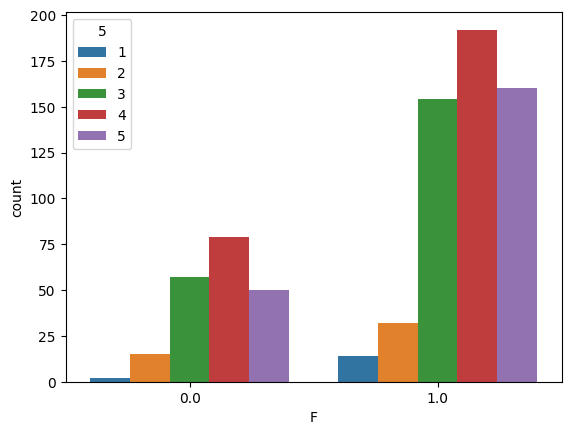

In [70]:
sns.countplot(x=df_final['F'],hue=df_final['5'])

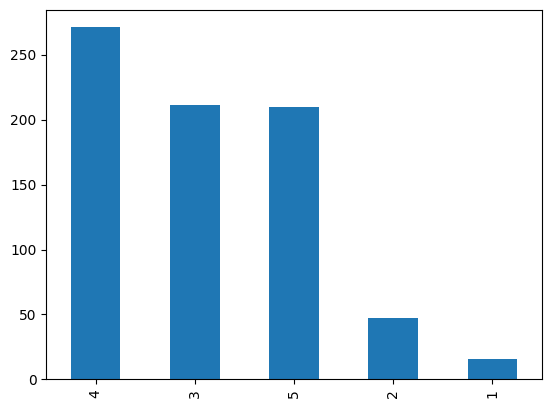

In [73]:
df_final['5'].value_counts().plot(kind='bar')
plt.show()